In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [24]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [25]:
tf.test.is_built_with_cuda()

False

In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

<Figure size 432x288 with 0 Axes>

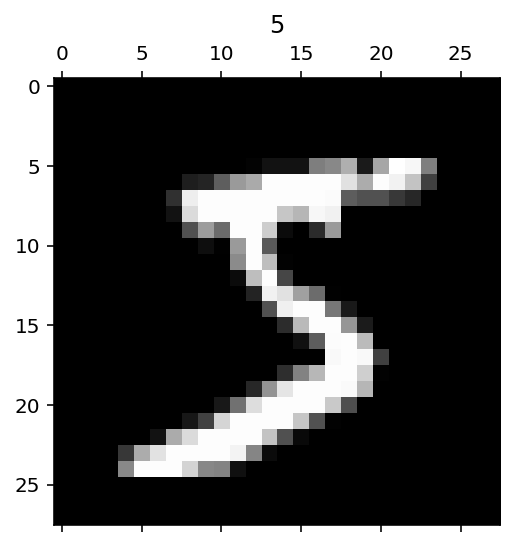

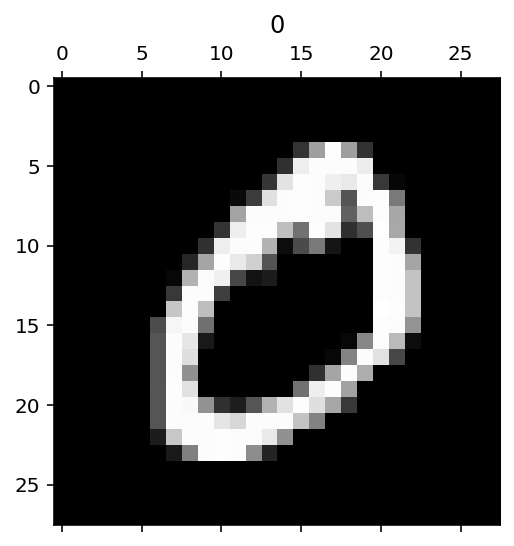

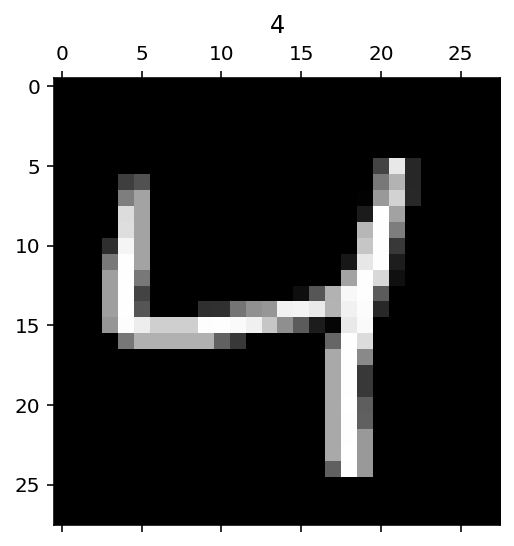

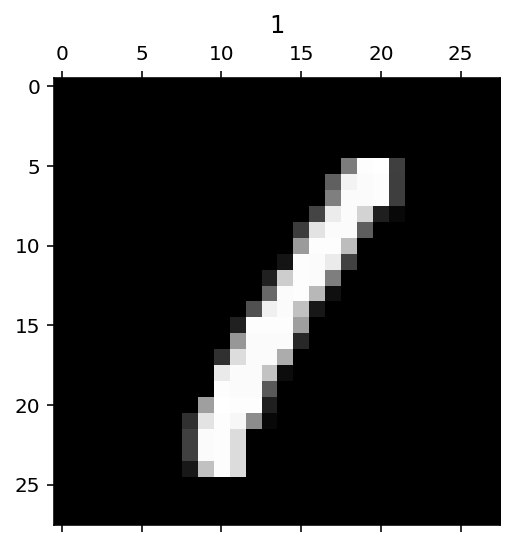

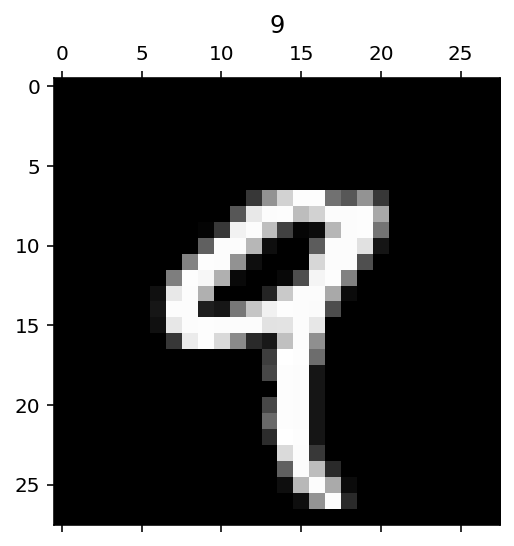

In [5]:
for i in range(5):
    plt.gray()
    plt.matshow(X_train[i]/255)
    plt.title(y_train[i])

In [6]:
X_train[1]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[1]

0

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# ARTIFICIAL NEURAL NETWORK

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
#     keras.layers.Dropout()
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
#     keras.layers.BatchNormalization()
])

tf_callback = tf.keras.callbacks.TensorBoard(log_dir ="./logs", histogram_freq=1)

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy' , 
             metrics = ['accuracy'])

f = model.fit(X_train, y_train, epochs = 50, callbacks=tf_callback)
    

Epoch 1/50
   1/1875 [..............................] - ETA: 0s - loss: 2.3805 - accuracy: 0.0312WARNING:tensorflow:From /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 1s 737us/step - loss: 0.2978 - accuracy: 0.9175
Epoch 2/50
1875/1875 [==============================] - 2s 891us/step - loss: 0.1373 - accuracy: 0.9599
Epoch 3/50
1875/1875 [==============================] - 1s 576us/step - loss: 0.0979 - accuracy: 0.9715
Epoch 4/50
1875/1875 [==============================] - 1s 571us/step - loss: 0.0753 - accuracy: 0.9776
Epoch 5/50
1875/1875 [==============================] - 1s 723us/step - loss: 0.0608 - accuracy: 0.9812
Epoch 6/50
1875/1875 [==============================] - 1s 572us/step - loss:

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 458us/step - loss: 0.1188 - accuracy: 0.9792


[0.11876071989536285, 0.979200005531311]

In [22]:
# %load_ext tensorboard
# %tensorboard --logdir logs/train/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
y_pred = model.predict(X_test)
y_pred

array([[2.09679584e-14, 1.14955600e-26, 4.57286010e-13, ...,
        9.99012232e-01, 1.75338838e-15, 2.63100219e-12],
       [1.91388670e-14, 7.44532961e-16, 9.90336001e-01, ...,
        0.00000000e+00, 2.74873397e-12, 1.32724890e-29],
       [1.51367989e-14, 9.93257582e-01, 4.78471804e-07, ...,
        3.23353106e-07, 7.96002496e-06, 1.52896579e-14],
       ...,
       [2.41583301e-33, 2.00531471e-22, 1.19053303e-21, ...,
        1.84429916e-10, 4.07016001e-12, 1.00915561e-10],
       [5.57876374e-23, 2.91008077e-21, 3.03521768e-22, ...,
        1.83879690e-23, 3.10831417e-12, 1.02776388e-23],
       [1.37774805e-14, 1.57917899e-23, 2.42977415e-15, ...,
        1.57410045e-26, 8.90138630e-22, 3.80382992e-33]], dtype=float32)

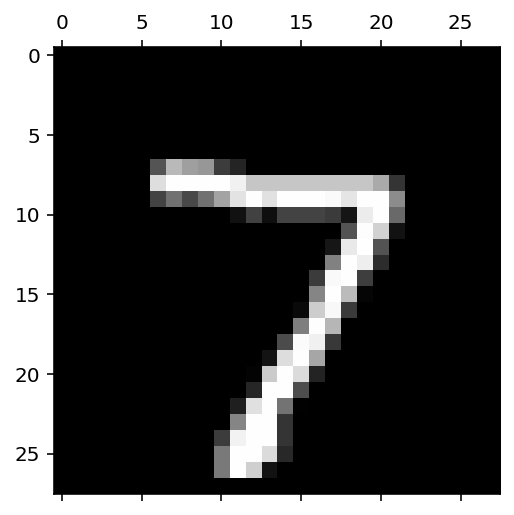

In [13]:
plt.matshow(X_test[0])

In [14]:
print(y_pred[0])
np.argmax(y_pred[0])

[2.0967958e-14 1.1495560e-26 4.5728601e-13 2.9883787e-10 1.6640019e-27
 3.3405510e-13 1.4958060e-28 9.9901223e-01 1.7533884e-15 2.6310022e-12]


7

In [15]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)

Text(123.0, 0.5, 'Truth')

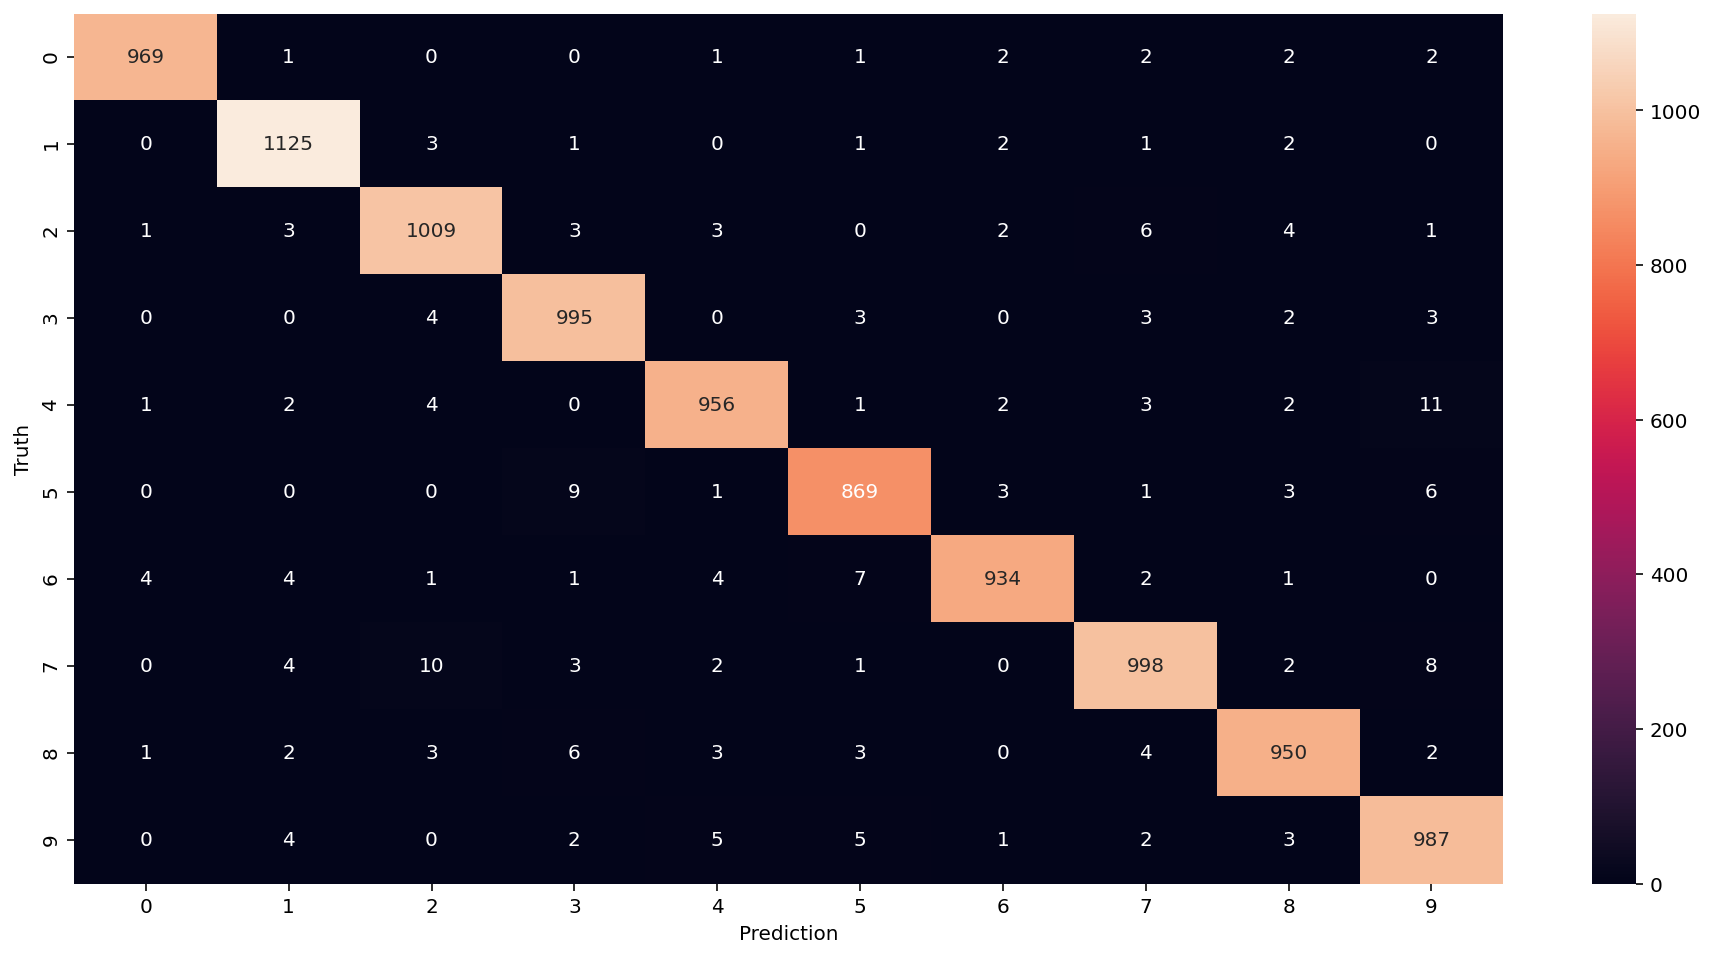

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [18]:
f.history['loss']

[0.2978314161300659,
 0.13733956217765808,
 0.0979047492146492,
 0.07534198462963104,
 0.06083541736006737,
 0.04952747002243996,
 0.04210793226957321,
 0.03477068245410919,
 0.02945735678076744,
 0.025043731555342674,
 0.020934997126460075,
 0.01858448050916195,
 0.016314774751663208,
 0.01332657877355814,
 0.01336123887449503,
 0.010298878885805607,
 0.009743956848978996,
 0.010277863591909409,
 0.00735859852284193,
 0.007047486957162619,
 0.0076907845214009285,
 0.006362568587064743,
 0.007200865540653467,
 0.007214275188744068,
 0.004524312913417816,
 0.0061239805072546005,
 0.0051443311385810375,
 0.004726712591946125,
 0.005661932751536369,
 0.0041701761074364185,
 0.005017648916691542,
 0.005158978048712015,
 0.002656259573996067,
 0.0061444793827831745,
 0.0031016382854431868,
 0.004462572745978832,
 0.002767557045444846,
 0.004558380227535963,
 0.0026520707178860903,
 0.0023588058538734913,
 0.00496285455301404,
 0.003691240679472685,
 0.002219999907538295,
 0.0038290924858301

In [19]:
f.history['accuracy']

[0.9175000190734863,
 0.9599000215530396,
 0.9715166687965393,
 0.977649986743927,
 0.9812333583831787,
 0.9846500158309937,
 0.9871000051498413,
 0.9894999861717224,
 0.9905833601951599,
 0.9922500252723694,
 0.9937333464622498,
 0.9945999979972839,
 0.9951000213623047,
 0.9962000250816345,
 0.9961833357810974,
 0.9972833395004272,
 0.9973499774932861,
 0.996916651725769,
 0.9979833364486694,
 0.998116672039032,
 0.9979000091552734,
 0.998199999332428,
 0.9979166388511658,
 0.9979166388511658,
 0.9987999796867371,
 0.998116672039032,
 0.9986000061035156,
 0.9987333416938782,
 0.9983999729156494,
 0.9989500045776367,
 0.9986166954040527,
 0.9986333250999451,
 0.9993833303451538,
 0.9980666637420654,
 0.9992666840553284,
 0.9987499713897705,
 0.9991666674613953,
 0.9987333416938782,
 0.9993833303451538,
 0.9994000196456909,
 0.9985833168029785,
 0.9990833401679993,
 0.9992666840553284,
 0.9989166855812073,
 0.9986666440963745,
 0.9993000030517578,
 0.9990833401679993,
 0.999400019645690

In [20]:
w = model.get_weights()
w

[array([[-0.01759642,  0.04569951,  0.07754694, ..., -0.07008886,
         -0.00209764, -0.00099513],
        [-0.01772299, -0.03066152,  0.04461722, ...,  0.00291514,
          0.0164228 ,  0.03795273],
        [ 0.07770824, -0.00748444,  0.08101656, ..., -0.03965376,
         -0.07846873, -0.05795312],
        ...,
        [-0.04099428,  0.00972009, -0.02191224, ..., -0.01270702,
          0.03165368,  0.03991253],
        [ 0.02472479,  0.06533644,  0.06645806, ...,  0.02800681,
          0.03839169,  0.01100995],
        [-0.05350242,  0.05153295,  0.08051492, ..., -0.03607142,
         -0.04027587, -0.00420061]], dtype=float32),
 array([ 0.09564193,  0.33051038,  0.14620724,  0.06626842,  0.1372561 ,
         0.3770021 ,  0.49908873,  0.2959432 ,  0.3516681 , -0.0364709 ,
         0.19893292,  0.21085845,  0.3597523 , -0.16167843,  0.00528469,
         0.22635996,  0.25548244, -0.07953106,  0.16932496,  0.2746004 ,
        -0.11779831, -0.30940402,  0.16519178,  0.3663738 ,  0.018

# HYPERPARAMETER TUNING